# Proyecto Integrado

# ¡Hola!  

Mi nombre es Maria Efimova, soy code reviewer de Practicum y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

Como empleado de Ice, una tienda online de videojuegos que vende en todo el mundo, tengo acceso a información valiosa como reseñas de usuarios y expertos, géneros de juegos, plataformas de juego y datos históricos de ventas. Mi tarea es analizar esta información para identificar patrones que puedan predecir el éxito de un juego. De esta manera, puedo encontrar proyectos prometedores y planificar campañas publicitarias efectivas para promocionarlos y aumentar las ventas.

Empezaremos importando todas las librerias y leyendo los datos que nos proveen para el analisis.

## 1. Visualizar datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
from scipy import stats as st
from matplotlib import pyplot as plt
import datetime

games.csv

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
games.duplicated().sum()

0

In [6]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Buen inicio!

## 1.1 Conclusiones a partir de visualizar los datos

Podemos ver que hay algunos datos que corregir como son los nombres de las columnas que no estan en snake_case, hay valores ausentes que hay que revisar, y la fecha que no esta en datetime. Vamos a corregir estos datos y analizarlos para ver que metodos aplicar en los valores ausentes y el por que de su existencia.

## 2. Corregir datos

In [7]:
games.columns = games.columns.str.lower()
#Cambiaremos la columna "year_of_release" a datetime[ns].
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y')

In [8]:
#Vamos a revisar los valores ausentes
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993-01-01,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993-01-01,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
games.query('year_of_release.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaT,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaT,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaT,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaT,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaT,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaT,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaT,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaT,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaT,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
games.query('critic_score.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984-01-01,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005-01-01,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
games.query('user_score.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984-01-01,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005-01-01,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
games.query('rating.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984-01-01,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005-01-01,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
games.query('rating.isna() and critic_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984-01-01,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005-01-01,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Dado a que hay algunos datos ausentes que representan gran cantidad en el dataframe, vamos a hacer algunos ajustes

##  2.1 Tratar valores ausentes

In [15]:
#Primero sacaremos las ventas totales
games['total_sales'] = (games['eu_sales'] + games['jp_sales'] + games['other_sales'] + games['na_sales'])

#Para lograr un mejor efecto en los siguientes pasos haremos que los "tbd" de "user_score" sean reemplazados por np.nan.
games['user_score'] = (games['user_score'].replace('tbd', np.nan)).astype('float64')

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Esta parte no es apropiada. El método `ffill` solo lo podemos utilizar con series de tiempo.

<div class="alert alert-block alert-info">
<b>Tomado en cuenta! No imputare entonces porque la critica de usuarios y profesionales puede diferir dependiendo de la plataforma. Puede que el mismo juego no sea tan bueno en XBox One como lo es en PS2 (Es un ejemplo).</b> <a class="tocSkip"></a>
</div>

In [16]:
games.query('name.duplicated()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
35,Call of Duty: Black Ops II,X360,2012-01-01,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
37,Call of Duty: Modern Warfare 3,PS3,2011-01-01,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010-01-01,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16706,Men in Black II: Alien Escape,GC,2003-01-01,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008-01-01,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [17]:
games.query('name.duplicated() and rating.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
59,Super Mario 64,DS,2004-01-01,Platform,5.01,3.07,1.25,0.97,NaN,NaN,NaN,10.30
99,Call of Duty: Black Ops 3,XOne,2015-01-01,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
157,Tetris,NES,1988-01-01,Puzzle,2.97,0.69,1.81,0.11,NaN,NaN,NaN,5.58
167,Super Mario World,GBA,2001-01-01,Platform,3.21,1.11,0.95,0.20,NaN,NaN,NaN,5.47
180,Minecraft,PS3,2014-01-01,Misc,2.03,2.37,0.00,0.87,NaN,NaN,NaN,5.27
...,...,...,...,...,...,...,...,...,...,...,...,...
16691,Dynasty Warriors: Eiketsuden,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008-01-01,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [18]:
#Como vemos, hay valores ausentes en el rating aunque tengan el mismo nombre de juego, es decir, que sea el mismo juego pero en otra plataforma.
#Para este caso vamos a imputar aquellos valores con el mismo valores de rating de aquellos duplicados que si tienen un valor de ese rating.

# Crear un diccionario que una a los juegos por nombre y calificacion, para poder imputar.
games_dict = {}

for name, group in games.groupby('name'):
    ratings = group['rating'].dropna().tolist()
    if ratings:
        games_dict[name] = ratings[0]

# Definimos una funcion que llene los valores ausentes.
def fill_dup_rating(row):
    name = row['name']
    rating = row['rating']
    if pd.isna(rating) and name in games_dict:
        return games_dict[name]
    else:
        return rating

# Ahora aplicamos la funcion.
games['rating'] = games.apply(fill_dup_rating, axis=1)


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Funciona correcto!

In [19]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6329
total_sales           0
dtype: int64

In [20]:
games.query('name.duplicated() and rating.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
59,Super Mario 64,DS,2004-01-01,Platform,5.01,3.07,1.25,0.97,NaN,NaN,NaN,10.30
99,Call of Duty: Black Ops 3,XOne,2015-01-01,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
157,Tetris,NES,1988-01-01,Puzzle,2.97,0.69,1.81,0.11,NaN,NaN,NaN,5.58
167,Super Mario World,GBA,2001-01-01,Platform,3.21,1.11,0.95,0.20,NaN,NaN,NaN,5.47
180,Minecraft,PS3,2014-01-01,Misc,2.03,2.37,0.00,0.87,NaN,NaN,NaN,5.27
...,...,...,...,...,...,...,...,...,...,...,...,...
16691,Dynasty Warriors: Eiketsuden,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008-01-01,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [21]:
games.query('name.duplicated() and rating.notnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
35,Call of Duty: Black Ops II,X360,2012-01-01,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
37,Call of Duty: Modern Warfare 3,PS3,2011-01-01,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010-01-01,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016-01-01,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
16673,Mortal Kombat: Deadly Alliance,GBA,2002-01-01,Fighting,0.01,0.00,0.00,0.00,81.0,8.8,M,0.01
16690,Pony Friends 2,PC,2009-01-01,Simulation,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014-01-01,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01


In [22]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

## 2.2 Conclusiones a partir de preparar los datos

    Imputar sobre los valores ausentes de las columnas de: "name", "genre", "critic_score", "user_score", "rating" y las columnas indicadoras de fechas seria algo muy arriesgado, pues son variables muy independientes bajo mis perspectivas. Es atrevido decir que las criticas de usuarios y criticas pueden depender de alguna de las variables como es las ventas totales, ya que puede que un juego se haya vendido bastante por muy buena propaganda pero al final las expectativas no fueron suficientes para los usuarios y criticos, por lo que puede tener una mala calificacion. Tambien imputar sobre fechas en este caso es algo que no creo sea optimo, pues las fechas parecen tener valores ausentes por motivos aleatorios, asi mismo como el nombre y genero del juego. En el caso de "rating", de todas maneras es dificil asumir la calificacion de la empresa ESRB, pues no podemos decir especificamente cual es su criterio de calificacion. 

    Por este motivo creo que si llego a imputar sobre esos valores ausentes la fiabilidad del producto del analisis pueda ser afectada a gran escala, ya que puede que el resultado de la imputacion no sea el verdadero. Para un analisis mas certero es preferible trabajar sobre aquellos datos que no tienen valores ausentes, despues de imputar sobre los valores ausentes que tenian una logica y correlacion mas alta.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>Aqui esta bien!

## 3. Analisis de datos

## 3.1 Cantidad de juegos por año.

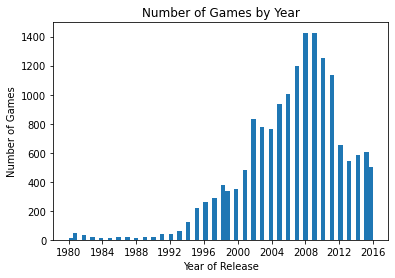

In [23]:
# Veamos cuantos juegos fueron lanzados en diferentes años.

games_by_years = games.groupby('year_of_release')[['name']].count().sort_values(ascending=False, by='name')
plt.hist(games_by_years.index, bins=70, weights=games_by_years.values)
plt.title('Number of Games by Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.show()

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a> Te pido anadir aqui el titulo para el grafico

<div class="alert alert-block alert-info">
<b>Agregado!</b> <a class="tocSkip"></a>
</div>

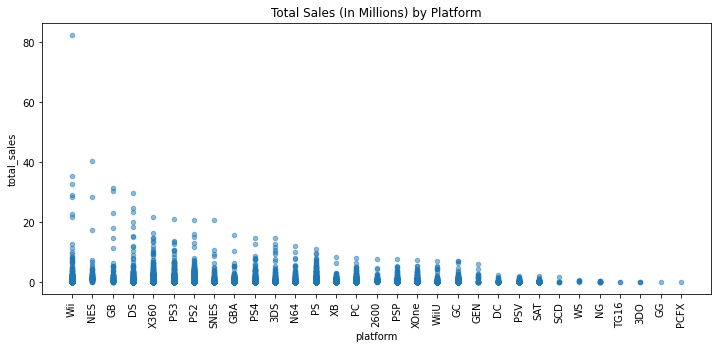

In [24]:
#Ventas totales por año
sales_by_platform = games.plot(x='platform', y='total_sales', alpha=0.5, kind='scatter', figsize=(12,5))
plt.title('Total Sales (In Millions) by Platform')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Debemos evitar el apiñamiento en los nombres del eje `x`.

<div class="alert alert-block alert-info">
<b>Solucionado!</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a> Te pido anadir aqui el titulo para el grafico

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a> Te pido anadir aqui los conclusiones

<div class="alert alert-block alert-info">
<b>Agregado el titulo y la conclusion mas extensa!</b> <a class="tocSkip"></a>
</div>

Aqui podemos ver que la fecha tope de los juegos fue en 2008 (en referencia a cantidad de juegos que se lanzaron), mientras pudimos observar las plataformas mas populares con un grafico de dispersion. Estas fueron: "Wii", "NES", "GB", "DS", "X360", "PS3", "PS2", "SNES", "GBA", "PS4".

## 3.2 Clasificacion y graficos de las consolas mas populares referente a las ventas totales.

In [25]:
#Vamos a hacer un dataframe que contenga las primeras 10 consolas populares que vemos en el anterior grafico.
top_ten_consoles = (games
                    .query('platform in ("Wii", "NES", "GB", "DS", "X360", "PS3", "PS2", "SNES", "GBA", "PS4")')
                    .pivot_table(index='platform', values="total_sales", aggfunc="count")
                    .sort_values(by='total_sales', ascending=False)
                   )
display(top_ten_consoles)

,total_sales
platform,
PS2,2161
DS,2151
PS3,1331
Wii,1320
X360,1262
GBA,822
PS4,392
SNES,239
GB,98


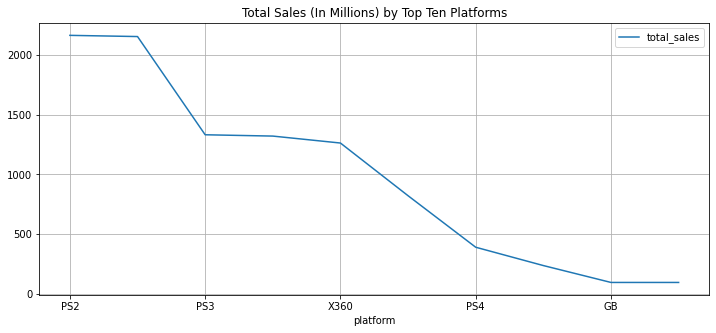

In [26]:
top_ten_consoles.plot(grid=True, figsize=(12,5))
plt.title('Total Sales (In Millions) by Top Ten Platforms')
plt.show()

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a> Te pido anadir aqui el titulo para el grafico

<div class="alert alert-block alert-info">
<b>Agregado!</b> <a class="tocSkip"></a>
</div>

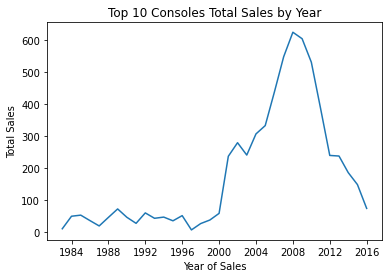

In [30]:
#Ahora veamos un grafico que muestre las ventas en de las diez consolas mas populares en referencia a los años.
top_ten_consoles_2 = games.query('platform in ("Wii", "NES", "GB", "DS", "X360", "PS3", "PS2", "SNES", "GBA", "PS4")')
top_ten_consoles_in_years = games.query('platform in ("Wii", "NES", "GB", "DS", "X360", "PS3", "PS2", "SNES", "GBA", "PS4")')
top_ten_consoles_in_years = top_ten_consoles_in_years.groupby('year_of_release')[['total_sales']].sum().sort_values(by='year_of_release', ascending=True)
plt.plot(top_ten_consoles_in_years.index, top_ten_consoles_in_years.values)
plt.xlabel('Year of Sales')
plt.ylabel('Total Sales')
plt.title('Top 10 Consoles Total Sales by Year')
plt.show()

In [31]:
#Para el analisis me interesa saber aquellas que sean del año 2000 en adelante.

top_ten_consoles_in_interested_years = top_ten_consoles_2.query('year_of_release >= 2000')
top_ten_consoles_in_interested_years['platform'].describe()

count     9301
unique       8
top        PS2
freq      2127
Name: platform, dtype: object

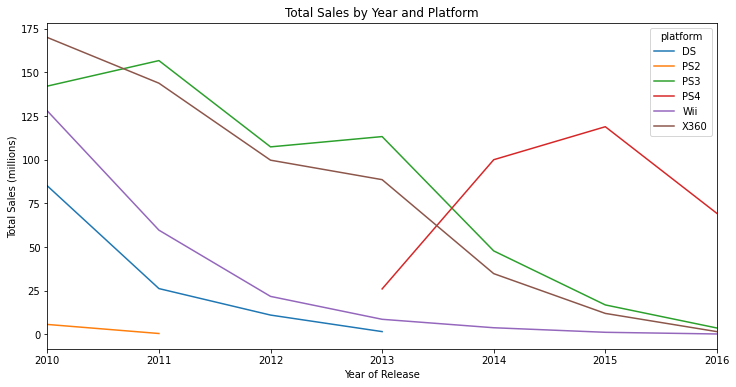

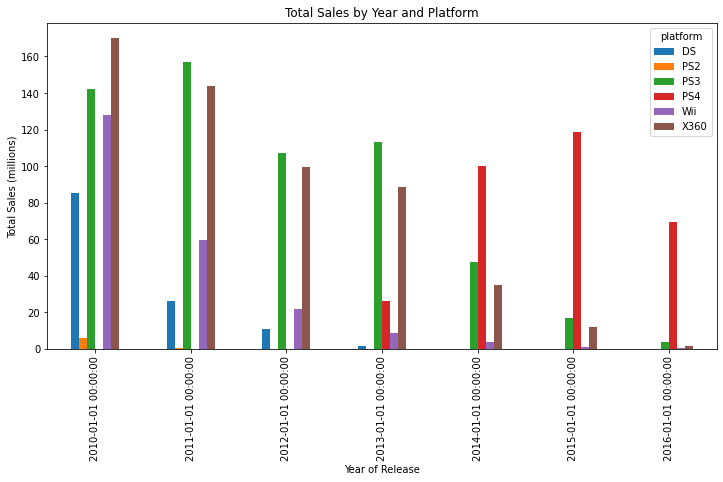

In [32]:
#Como nuestro objetivo es hacer predicciones o sugerencias para el 2017, veamos del 2010 en adelante.
consoles_beyond_2010 = top_ten_consoles_in_interested_years.query('year_of_release >= 2010')

#Hagamos un grafico
sales_by_year_and_platform = (consoles_beyond_2010
                              .pivot_table(values='total_sales', index='year_of_release', columns='platform', aggfunc='sum')
                             )
sales_by_year_and_platform.plot(kind='line', figsize=(12,6))
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (millions)')
plt.title('Total Sales by Year and Platform')
plt.show()

sales_by_year_and_platform.plot(kind='bar', figsize=(12,6))
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (millions)')
plt.title('Total Sales by Year and Platform')
plt.show()

Como conclusiones podemos ver que las plataformas mas populares son "Wii", "NES", "GB", "DS", "X360", "PS3", "PS2", "SNES", "GBA", y "PS4". Como nuestro analisis esta enfocado a hacer unas predicciones o sugerencias para el 2017, usaremos aquellos datos del 2010 en adelante para poder ver cual de estas consolas es la que tiene menos decrecimiento, lo que puede indicar que es mas vigente para el 2017. Tras trazar un grafico lineal pudimos ver que la ps4 es la que tiene mas ventas recientes y menos decrecimiento.

Igual seguiremos haciendo un analisis de las 5 plataformas mas populares desde el 2010 para poder saber los generos mas populares, clasificaciones, etc.

## 3.3 Clasificacion de las 5 plataformas mas populares y sus respectivos gráficos con referencia a las ventas totales.

In [33]:
top_5_consoles = games.query('platform in ("PS2", "PS3", "X360", "DS", "Wii")')
top_5_consoles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8225 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             8225 non-null   object        
 1   platform         8225 non-null   object        
 2   year_of_release  8072 non-null   datetime64[ns]
 3   genre            8225 non-null   object        
 4   na_sales         8225 non-null   float64       
 5   eu_sales         8225 non-null   float64       
 6   jp_sales         8225 non-null   float64       
 7   other_sales      8225 non-null   float64       
 8   critic_score     4336 non-null   float64       
 9   user_score       4160 non-null   float64       
 10  rating           5901 non-null   object        
 11  total_sales      8225 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 835.4+ KB


In [34]:
ps2_graph = top_5_consoles.query('platform == "PS2"')
ps2_graph_by_years = ps2_graph.groupby('year_of_release')[['total_sales']].sum().sort_values(by='year_of_release', ascending=True)
ps2_graph_by_years

,total_sales
year_of_release,
2000-01-01,39.17
2001-01-01,166.43
2002-01-01,205.38
2003-01-01,184.31
2004-01-01,211.81
2005-01-01,160.66
2006-01-01,103.42
2007-01-01,75.99
2008-01-01,53.90


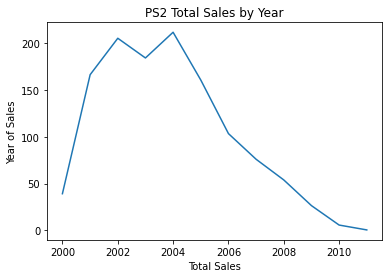

In [35]:
plt.plot(ps2_graph_by_years.index, ps2_graph_by_years['total_sales'])
plt.xlabel('Total Sales')
plt.ylabel('Year of Sales')
plt.title('PS2 Total Sales by Year')
plt.show()

In [36]:
ps3_graph = top_5_consoles.query('platform == "PS3"')
ps3_graph_by_years = ps3_graph.groupby('year_of_release')[['total_sales']].sum().sort_values(by='year_of_release', ascending=True)
ps3_graph_by_years

,total_sales
year_of_release,
2006-01-01,20.96
2007-01-01,73.19
2008-01-01,118.52
2009-01-01,130.93
2010-01-01,142.17
2011-01-01,156.78
2012-01-01,107.36
2013-01-01,113.25
2014-01-01,47.76


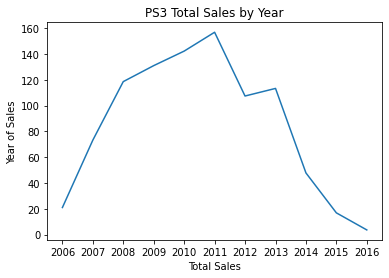

In [37]:
plt.plot(ps3_graph_by_years.index, ps3_graph_by_years['total_sales'])
plt.xlabel('Total Sales')
plt.ylabel('Year of Sales')
plt.title('PS3 Total Sales by Year')
plt.show()

In [38]:
x360_graph = top_5_consoles.query('platform == "X360"')
x360_graph_by_years = x360_graph.groupby('year_of_release')[['total_sales']].sum().sort_values(by='year_of_release', ascending=True)
x360_graph_by_years

,total_sales
year_of_release,
2005-01-01,8.25
2006-01-01,51.62
2007-01-01,95.41
2008-01-01,135.26
2009-01-01,120.29
2010-01-01,170.03
2011-01-01,143.84
2012-01-01,99.74
2013-01-01,88.58


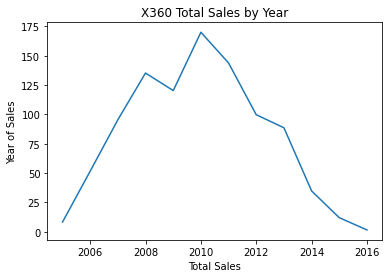

In [39]:
plt.plot(x360_graph_by_years.index, x360_graph_by_years['total_sales'])
plt.xlabel('Total Sales')
plt.ylabel('Year of Sales')
plt.title('X360 Total Sales by Year')
plt.show()

In [40]:
ds_graph = top_5_consoles.query('platform == "DS"')
ds_graph_by_years = ds_graph.groupby('year_of_release')[['total_sales']].sum().sort_values(by='year_of_release', ascending=True)
ds_graph_by_years

,total_sales
year_of_release,
1985-01-01,0.02
2004-01-01,17.27
2005-01-01,130.14
2006-01-01,119.81
2007-01-01,146.94
2008-01-01,145.31
2009-01-01,119.54
2010-01-01,85.02
2011-01-01,26.18


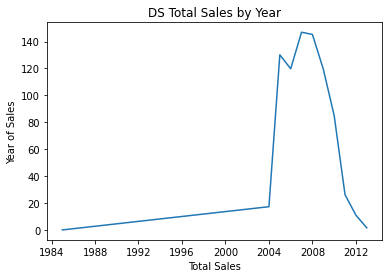

In [41]:
plt.plot(ds_graph_by_years.index, ds_graph_by_years['total_sales'])
plt.xlabel('Total Sales')
plt.ylabel('Year of Sales')
plt.title('DS Total Sales by Year')
plt.show()

In [42]:
wii_graph = top_5_consoles.query('platform == "Wii"')
wii_graph_by_years = wii_graph.groupby('year_of_release')[['total_sales']].sum().sort_values(by='year_of_release', ascending=True)
wii_graph_by_years

,total_sales
year_of_release,
2006-01-01,137.15
2007-01-01,152.77
2008-01-01,171.32
2009-01-01,206.97
2010-01-01,127.95
2011-01-01,59.65
2012-01-01,21.71
2013-01-01,8.59
2014-01-01,3.75


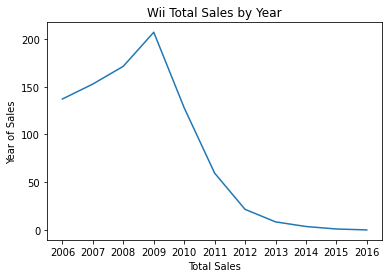

In [43]:
plt.plot(wii_graph_by_years.index, wii_graph_by_years['total_sales'])
plt.xlabel('Total Sales')
plt.ylabel('Year of Sales')
plt.title('Wii Total Sales by Year')
plt.show()

Hicimos graficos sobre cada una de las 5 plataformas mas populars en referencia a ventas totales por año. Estas plataformas fueron: "PS2", "DS", "PS3", "Wii", "X360" en orden descendente (de mas popular a menos popular). Sus ventas nos pueden ayudar con una imagen general sobre la vida util de las plataformas, pero se necesitan mas calculos.

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a> Te pido anadir aqui mas conclusiones

<div class="alert alert-block alert-info">
<b>Agregado!</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Muy bien que aqui anades los titulos!

## 3.4 Unión de los dataframe que contienen las ventas de cada consola, sobre el año de lanzamiento.

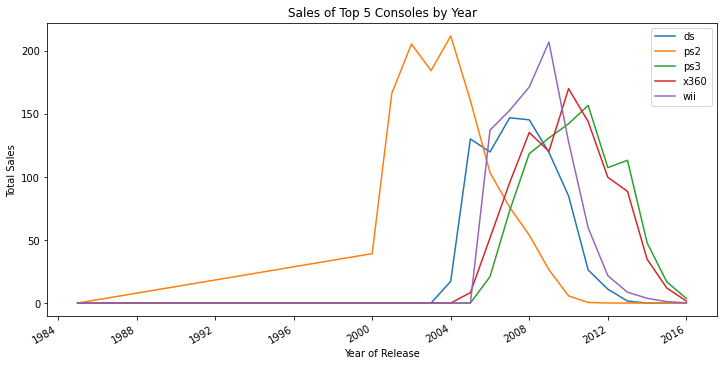

In [44]:
#Unimos todos los dataframes centrados en el año de lanzamiento, y rellenamos sus valores ausentes con 0.
merged_df = ds_graph_by_years.merge(ps2_graph_by_years, how='outer', on='year_of_release')
merged_df = merged_df.rename(columns={'total_sales_x':'ds', 'total_sales_y': 'ps2'})
merged_df = merged_df.merge(ps3_graph_by_years, how='outer', on='year_of_release')
merged_df = merged_df.merge(x360_graph_by_years, how='outer', on='year_of_release')
merged_df = merged_df.merge(wii_graph_by_years, how='outer', on='year_of_release')
merged_df = merged_df.rename(columns={'total_sales_x': 'ps3', 'total_sales_y': 'x360', 'total_sales':'wii'})
merged_df = merged_df.fillna(0)
merged_df.index.name = 'year_of_release'

#Creamos un diagrama para mejor visualizacion de los datos.
merged_df.plot(y=['ds', 'ps2', 'ps3', 'x360', 'wii'], kind='line', figsize=(12, 6))
plt.title('Sales of Top 5 Consoles by Year')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.show()

Unimos los dataframes para ver un diagrama conjunto de las top 5 consolas. Pudimos hacer un grafico lineal que las representara, y vimos los picos de cada una de las plataformas asi como sus respectivos años. Esta información nos ayudará para clasificar los años relevantes, pues nuestro analisis no se enfoca en algunas fechas que no sean relevantes. Vamos a usar los ultimos 5 años.

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a> Te pido anadir aqui los conclusiones

<div class="alert alert-block alert-info">
<b>Agregado!</b> <a class="tocSkip"></a>
</div>

## 3.5 Separacion del dataframe con los años de interés para el análisis.

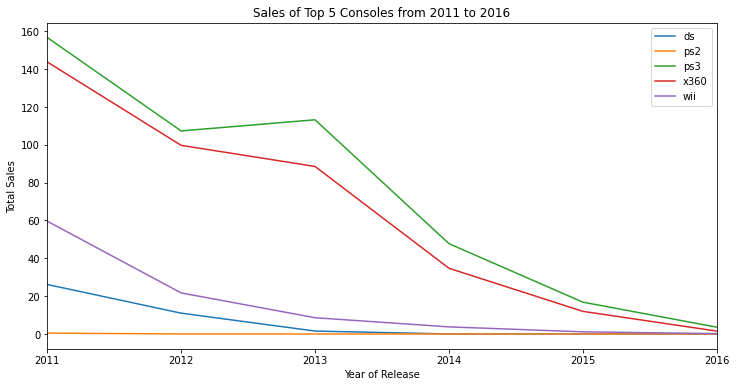

In [45]:
#Creamos una variable que contenga los años de interés.
interested_years = merged_df.reset_index()
interested_years = merged_df.query('year_of_release >= 2011')
interested_years.plot(y=['ds', 'ps2', 'ps3', 'x360', 'wii'], kind='line', figsize=(12, 6))
plt.title('Sales of Top 5 Consoles from 2011 to 2016')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.show()

In [46]:
display(interested_years.sort_values(by='year_of_release', ascending=False))

,ds,ps2,ps3,x360,wii
year_of_release,,,,,
2016-01-01,0.00,0.00,3.60,1.52,0.18
2015-01-01,0.00,0.00,16.82,11.96,1.14
2014-01-01,0.00,0.00,47.76,34.74,3.75
2013-01-01,1.54,0.00,113.25,88.58,8.59
2012-01-01,11.01,0.00,107.36,99.74,21.71
2011-01-01,26.18,0.45,156.78,143.84,59.65


Separamos los años de interes para el analisis, los cuales son del 2011 para adelante. Seguimos usando el dataframe de las top 5 consolas unidas. Logramos hacer un grafico que representara el movimiento de las ventas totales de las top 5 consolas de los años 2011 a 2016. Vimos que las ventas en la mayoría van de arriba para abajo (decrecientes), y la que se mantiene más a flote es la PS3.

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a> Te pido anadir aqui los conclusiones del grafico

<div class="alert alert-block alert-info">
<b>Agregada!</b> <a class="tocSkip"></a>
</div>

## 3.6 Tomar el valor de consideración para el éxito de una plataforma y ver cuántos años de cada consola cumple la condicion.

In [47]:
#Para saber cuando se considera exitosa una consola referente a las ventas
#tomaremos como indicador el promedio de la suma de los valores maximos de cada consola.
ds_mean = interested_years['ds'].mean()
ps2_mean = interested_years['ps2'].mean()
ps3_mean = interested_years['ps3'].mean()
wii_mean = interested_years['wii'].mean()
x360_mean = interested_years['x360'].mean()
console_success_value = (ds_mean + ps2_mean + ps3_mean + wii_mean + x360_mean) / 5
print(f'El valor que se va a considerar de ventas totales para calificar si la consola es exitosa es: {console_success_value}')

El valor que se va a considerar de ventas totales para calificar si la consola es exitosa es: 32.00500000000002


In [48]:
ds_life = (interested_years[['ds']]).rename(columns={'ds': 'years'}).query('years >= @console_success_value').count()
ps2_life = (interested_years[['ps2']]).rename(columns={'ps2': 'years'}).query('years >= @console_success_value').count()
ps3_life = (interested_years[['ps3']]).rename(columns={'ps3': 'years'}).query('years >= @console_success_value').count()
x360_life = (interested_years[['x360']]).rename(columns={'x360': 'years'}).query('years >= @console_success_value').count()
wii_life = (interested_years[['wii']]).rename(columns={'wii': 'years'}).query('years >= @console_success_value').count()

In [49]:
console_life_years = (ds_life + ps2_life + ps3_life+ x360_life + wii_life) / 5
console_life_years

years    1.8
dtype: float64

Despues de haber hecho todos los graficos que nos puedan ayudar a visualizar las plataformas mas populares de nuestro dataframe original, pudimos hacer un groupby con aquellas que tenian mas juegos vendidos y ventas totales. Con ese groupby pudimos crear una variable que conservara las plataformas por sus respectivos años. 

Hicimos tambien un diagrama lineal sobre cada una de las plataformas. El diagrama nos dió una visualizacion, pero para poder llegar a ser más certeros, vimos los datos organizados al hacer un merge que nos daban todas las consolas unidas en un solo dataframe y cada año. Para hacer esto hicimos que los valores numpy.nan de las consolas que por motivos que desconocemos están ausentes (puede que sea por el hecho que aún no existían o simplemente no son aleatorios o no hay registro de su existencia), sean reemplazados por el valor 0.

Luego sacamos el valor promedio de ventas totales de cada consola de ese dataframe y lo dividimos para 5 (cantidad de consolas), para asi scar un promedio que se guardó en la variable "consoles_success_value". Luego hicimos un query de cada consola para que nos devolviera cuántos años superaron o igualaron ese valor que fue determinado como índice se éxito. Sumamos todos los valores y los dividimos para 5 (cantidad de consolas), y nos dió el valor de 1.8, que serían 1 año con 10 meses aproximadamente. Estos representan la cantidad de tiempo de exito de una consola (es decir, su pico).

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Genial!

## 3.7 Diagrama de caja y bigotes sobre las ventas totales por plataforma.

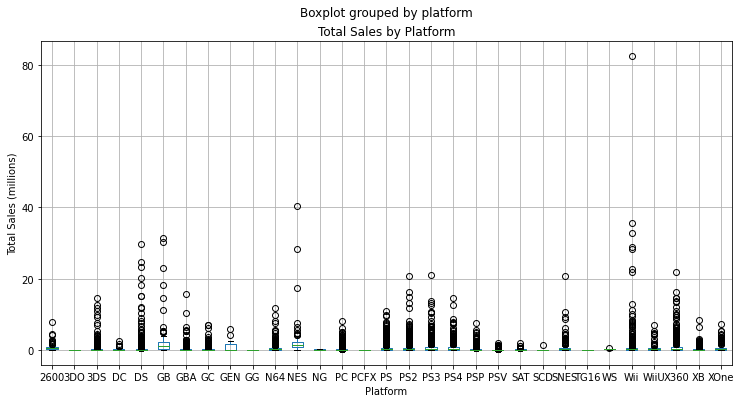

In [50]:
#Ahora crearemos un diagrama de caja para las ventas globales de los juegos, por plataforma.
fig, ax = plt.subplots(figsize=(12, 6))

# Creamos el boxplot y lo guardaremos en la variable "platform_sales_boxplot"
platform_sales_boxplot = games.boxplot(column='total_sales', by='platform', grid=True, ax=ax)

# Agregamos el titulo, y ejes.
ax.set_title('Total Sales by Platform')
ax.set_xlabel('Platform')
ax.set_ylabel('Total Sales (millions)')
plt.show()

Podemos ver que las diferencias entre plataformas son significativas, tomando como ejemplo plataformas que apenas tienen ventas, como "GG". Tambien se logra visualizar que la media de las ventas totales en muchos casos no logra superar el millon de ventas. Quiza el promedio no es alto, pero en si se pueden ver que entonces hay varios valores atipicos para las ventas. Tenemos que tener en cuenta que de todas maneras se realizo el diagrama de caja y bigotes con datos que pueden tener valores ausentes (ya se porque la consola no existia, no hay registro, etc), por lo que puede tener cierta relevancia. De todas maneras ya se dejo constancia de aquello.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Todo bien con esa parte!

## 3.8 Gráfico de dispersión y correlación de la crítica de usuarios y profesionales por la plataforma "DS".

Valores a tomar en cuenta para corrleacion:

- cuando corr() <= 0.10 es debil

- cuando 0.10 < corr() <= 0.30 es moderada

- cuando 0.49 < corr() <= 1.0 es fuerte

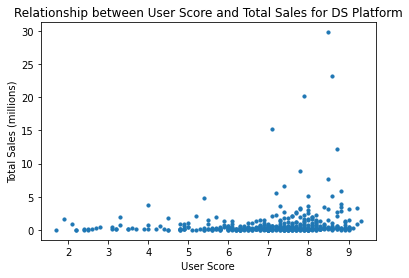

0.13945346537325198


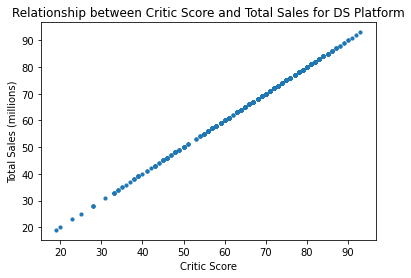

0.230940511166079


In [51]:
# Creamos un dataframe que contenga solo la plataforma "DS" y aplicamos un "dropna" en las columnas "user_score" y "total_sales".
ds_games = games.query('platform == "DS"').dropna(subset=['user_score', 'critic_score', 'total_sales'])

plt.scatter(ds_games['user_score'], ds_games['total_sales'], s=10)
plt.xlabel('User Score')
plt.ylabel('Total Sales (millions)')
plt.title('Relationship between User Score and Total Sales for DS Platform')
plt.show()
print(ds_games['user_score'].corr(ds_games['total_sales']))

plt.scatter(ds_games['critic_score'], ds_games['critic_score'], s=10)
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')
plt.title('Relationship between Critic Score and Total Sales for DS Platform')
plt.show()
print(ds_games['critic_score'].corr(games['total_sales']))

Podemos ver a traves del grafico que la correlacion con "user_score" es baja, pero en el caso de la critica profesional (critic_score), muestra una correlacion positiva casi perfecta. Luego al usar la funcion de corr() corroboramos que la correlacion de user_score no es alta, pero nos desconcierta que la correlacion que devuelve esta herramienta entre las ventas totales y la critica profesional es moderada. Nos surge la interrogante del por que. Pues los graficos de dispersion a veces toman en cuenta otras variables que la funcion corr() no logra hallar. Ahora vamos a ver la correlacion entre las demas plataformas.

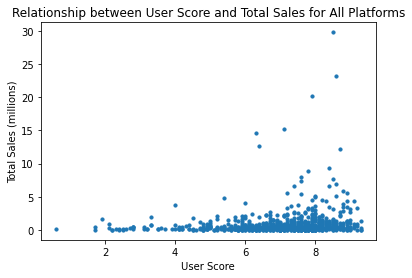

0.14175470974904064


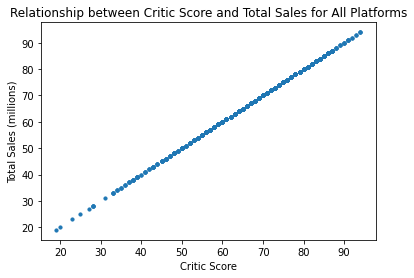

0.25856157157882415


In [52]:
games_of_interest = ds_games[['name']]
matching_games = (games[games['name'].isin(games_of_interest['name'])]).dropna(subset=['user_score', 'critic_score', 'total_sales'])
plt.scatter(matching_games['user_score'], matching_games['total_sales'], s=10)
plt.xlabel('User Score')
plt.ylabel('Total Sales (millions)')
plt.title('Relationship between User Score and Total Sales for All Platforms')
plt.show()
print(matching_games['user_score'].corr(matching_games['total_sales']))

plt.scatter(matching_games['critic_score'], matching_games['critic_score'], s=10)
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')
plt.title('Relationship between Critic Score and Total Sales for All Platforms')
plt.show()
print(matching_games['critic_score'].corr(matching_games['total_sales']))

Al repetir los mismos pasos que hicimos con la consola "DS", nos corrobora nuestras conclusiones previas. La correlacion entre la critica de usuario (user_score) y las ventas totales (total_sales) es baja, pero en el caso de la critica profesional (critic_score) es al contrario, pues demuestra una fuerte correlacion a traves de los graficos de dispersion.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Bien!

## 3.9 Distribucion general de los juegos por genero

Vamos a revisar cuales generos son los mas populares y si se puede generalizar al decir cuales son los mas populares, es decir, los que tienen ventas bajas y altas.

In [53]:
games_by_genre = games.dropna(subset=['genre', 'name', 'total_sales'])
games_by_genre = games.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
games_by_genre

,genre,total_sales
0,Action,1744.17
10,Sports,1331.27
8,Shooter,1052.45
7,Role-Playing,934.56
4,Platform,827.77
3,Misc,802.51
6,Racing,728.67
2,Fighting,447.53
9,Simulation,389.97
5,Puzzle,242.57


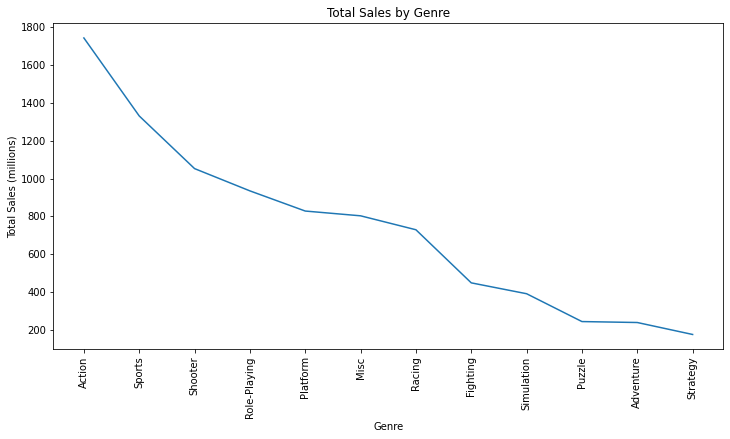

In [54]:
#Ahora para mejor visualizacion, haremos un grafico linear y de barras.
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(games_by_genre['genre'], games_by_genre['total_sales'])
ax.set_title('Total Sales by Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Total Sales (millions)')
plt.xticks(rotation=90)
plt.show()

Vemos que entre los mas populares generos referente a las ventas totales estan los de accion, deporte y tirador. Se puede decir que a lo mejor es porque la mayor clientela de los videojuegos son los adolescentes hasta adultos, entre los cuales estan estos de preferencia. Claro esta decir que son generalizaciones, mas no hechos. Para contrastar, vemos que los menos comprados son los de estrategia, aventura y acertijos. Se puede decir que la mayoria de compradores no busca usar su tiempo libre o liberarse en este tipo de juegos, pues puede creer que son mas un trabajo que diversion. Debemos recordar que para cada genero hay su mercado, pero en este caso nuestro analisis no va dirigido hacia ese rumbo, por lo que se puede decir como conclusion que los proximos juegos deberian evitar ser de las categorias de estrategia, aventura, o acertijos. Deberian tener una preferencia por hacer juegos de accion, deportes y tirador.

## 4. Creacion de perfiles por regiones (NA, EU, JP)

## 4.1 Plataformas principales de NA, EU, JP y sus respectivas varianzas y desviaciones estandar.

In [55]:
# Perfil de NA
na_profile = games.drop(columns=['total_sales', 'eu_sales', 'jp_sales', 'other_sales'])
eu_profile = games.drop(columns=['total_sales', 'na_sales', 'jp_sales', 'other_sales'])
jp_profile = games.drop(columns=['total_sales', 'eu_sales', 'na_sales', 'other_sales'])

In [56]:
# Plataformas principales de NA
na_profile_platforms = na_profile.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
na_profile_platforms

,platform,na_sales
28,X360,602.47
16,PS2,583.84
26,Wii,496.90
17,PS3,393.49
4,DS,382.40
15,PS,336.52
6,GBA,187.54
29,XB,186.69
10,N64,139.02
7,GC,133.46


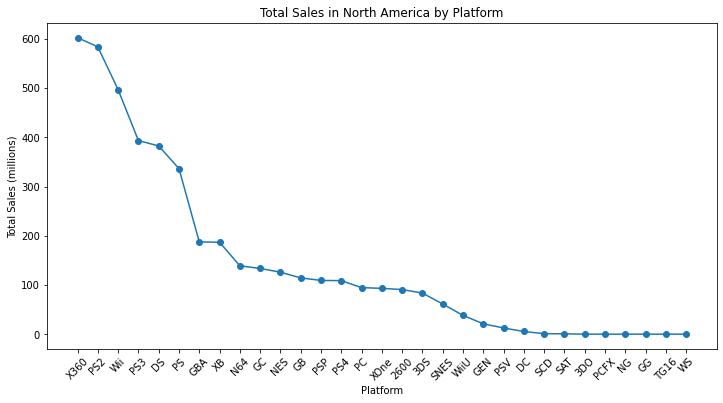

In [57]:
#Grafico de las plataformas mas populares referentes a ventas de NA
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(na_profile_platforms['platform'], na_profile_platforms['na_sales'], marker='o')

ax.set_title('Total Sales in North America by Platform')
ax.set_xlabel('Platform')
ax.set_ylabel('Total Sales (millions)')

plt.xticks(rotation=45)

plt.show()

In [58]:
#Calculamos la varianza y desviacion estandar de las ventas de NA
print(np.var(na_profile_platforms['na_sales']))
print(np.std(na_profile_platforms['na_sales']))

30268.69502414121
173.97900742371536


In [59]:
#Plataformas principales de EU
eu_profile_platforms = eu_profile.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
eu_profile_platforms

,platform,eu_sales
16,PS2,339.29
17,PS3,330.29
28,X360,270.76
26,Wii,262.21
15,PS,213.61
4,DS,188.89
13,PC,142.44
18,PS4,141.09
6,GBA,75.25
19,PSP,66.68


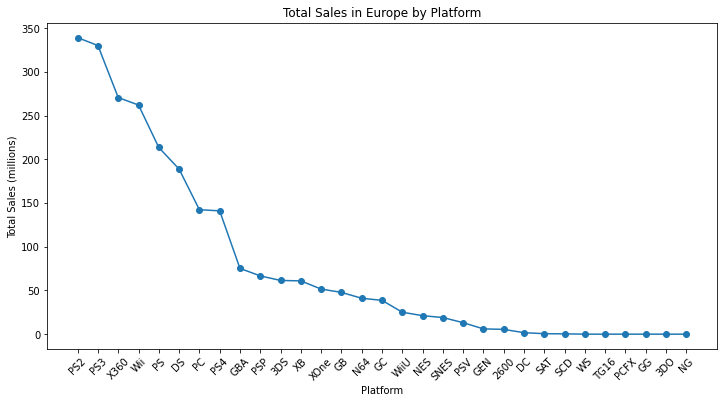

In [60]:
#Grafico de las plataformas mas populares de EU
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(eu_profile_platforms['platform'], eu_profile_platforms['eu_sales'], marker='o')

ax.set_title('Total Sales in Europe by Platform')
ax.set_xlabel('Platform')
ax.set_ylabel('Total Sales (millions)')

plt.xticks(rotation=45)

plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Genial!

In [61]:
#Calculamos la varianza y desviacion estandar de EU
print(np.var(eu_profile_platforms['eu_sales']))
print(np.std(eu_profile_platforms['eu_sales']))

10501.675573360915
102.47768329427103


In [62]:
#Plataformas principales de JP
jp_profile_platforms = jp_profile.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
jp_profile_platforms

,platform,jp_sales
4,DS,175.57
15,PS,139.82
16,PS2,139.20
23,SNES,116.55
2,3DS,100.67
11,NES,98.65
5,GB,85.12
17,PS3,80.19
19,PSP,76.78
26,Wii,69.33


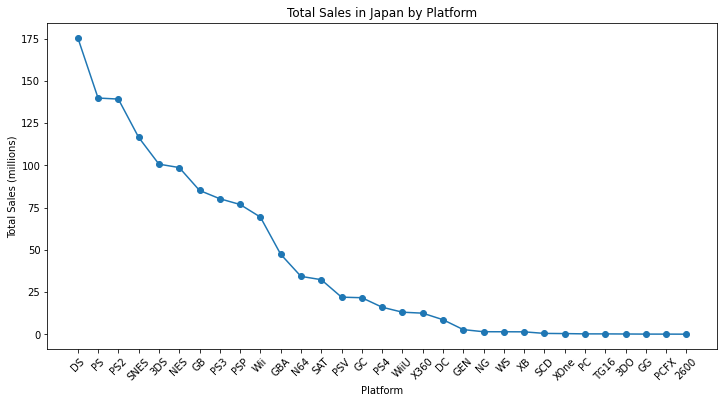

In [63]:
#Grafico de las plataformas mas populares de JP
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(jp_profile_platforms['platform'], jp_profile_platforms['jp_sales'], marker='o')

ax.set_title('Total Sales in Japan by Platform')
ax.set_xlabel('Platform')
ax.set_ylabel('Total Sales (millions)')

plt.xticks(rotation=45)

plt.show()

In [64]:
#Calculamos la varianza y desviacion estandar de JP
print(np.var(jp_profile_platforms['jp_sales']))
print(np.std(jp_profile_platforms['jp_sales']))

2559.5544060353877
50.59203895906339


Podemos ver que las consolas mas compradas en EU y NA son iguales (top 5), mientras que en JP cambia un poco. Tambien podemos ver que las desviaciones estandar y varianzas cambian por region, yendo por orden de primero a tercer lugar con mayores valores para ambas, NA-EU-JP.

Igual en los tres casos podemos ver que la varianza es alta, indicando que los valores no estan de por si muy cerca a la media. En el caso de desviacion estandar nos representa que los datos son dispersos, es decir, no estan cerca de ser iguales. Al comparar las varianzas vemos que los de japon son los que tienen valores mas cercanos a su media y menos dispersas, mientras que los norte americanos tienen muchos valores atipicos.

## 4.2 Generos principales por region: NA, EU, JP

In [65]:
#Generos principales de NA
na_profile_genre = na_profile.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
na_profile_genre

,genre,na_sales
0,Action,879.01
10,Sports,684.43
8,Shooter,592.24
4,Platform,445.50
3,Misc,407.27
6,Racing,359.35
7,Role-Playing,330.81
2,Fighting,223.36
9,Simulation,181.92
5,Puzzle,122.87


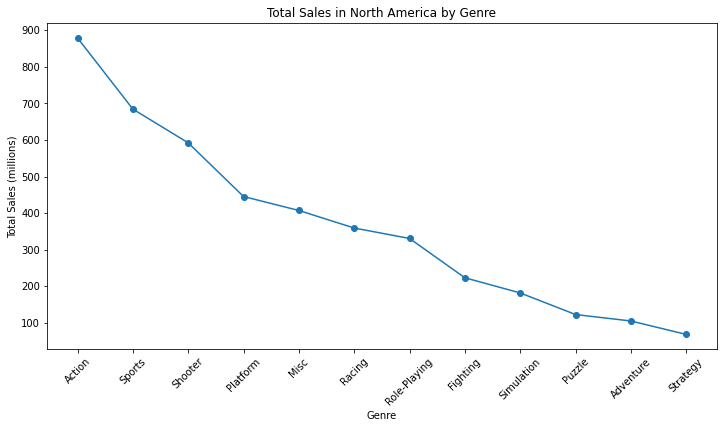

In [66]:
#Grafico de los generos mas populares de NA
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(na_profile_genre['genre'], na_profile_genre['na_sales'], marker='o')

ax.set_title('Total Sales in North America by Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Total Sales (millions)')

plt.xticks(rotation=45)

plt.show()

In [67]:
#Generos principales de EU
eu_profile_genre = eu_profile.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
eu_profile_genre

,genre,eu_sales
0,Action,519.13
10,Sports,376.79
8,Shooter,317.34
6,Racing,236.51
3,Misc,212.74
4,Platform,200.35
7,Role-Playing,188.71
9,Simulation,113.52
2,Fighting,100.33
1,Adventure,63.54


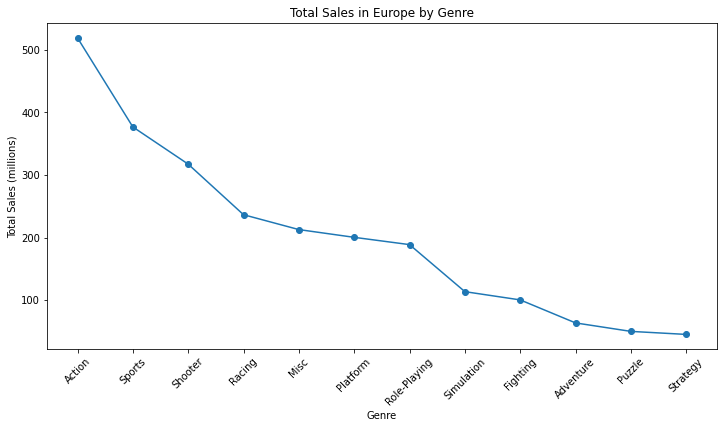

In [68]:
#Grafico de los generos mas populares de EU
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(eu_profile_genre['genre'], eu_profile_genre['eu_sales'], marker='o')

ax.set_title('Total Sales in Europe by Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Total Sales (millions)')

plt.xticks(rotation=45)

plt.show()

In [69]:
#Generos principales de JP
jp_profile_genre = jp_profile.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
jp_profile_genre

,genre,jp_sales
7,Role-Playing,355.41
0,Action,161.43
10,Sports,135.54
4,Platform,130.83
3,Misc,108.11
2,Fighting,87.48
9,Simulation,63.80
5,Puzzle,57.31
6,Racing,56.71
1,Adventure,52.30


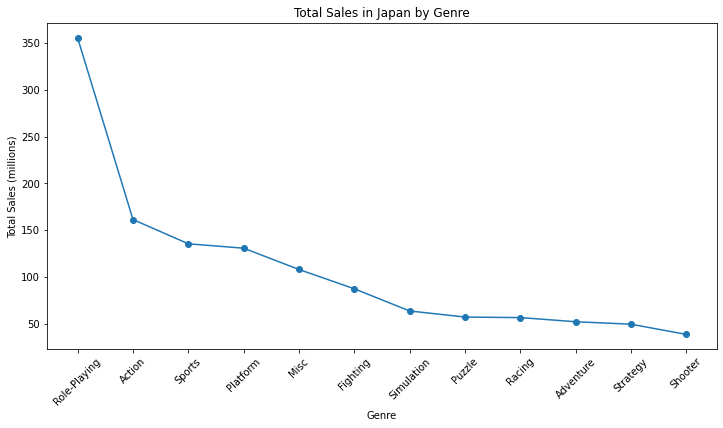

In [70]:
#Grafico de los generos mas populares de JP
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(jp_profile_genre['genre'], jp_profile_genre['jp_sales'], marker='o')

ax.set_title('Total Sales in Japan by Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Total Sales (millions)')

plt.xticks(rotation=45)

plt.show()

Vemos que los generos mas populares de los tres perfiles son muy similares, aunque a Norteamerica le gusta mas los juegos del genero "platform" que "Racing" que a los europeos, por lo que se su cuarto lugar difiere algo. En cambio al contrastar con japon, el genero mas exitoso no es el de accion, si no el de "role-playing", indicando singularidad en sus generos. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Los conclusiones son correctos!

## 4.3 Efecto de las calificaciones de ESRB ('rating'), referente a las ventas.

Calificaciones de ESRB:

- E: Para todos.

- T: Para adolescentes.

- M: Maduros. Para 17 años en adelante.

- E10: Para todos de 10 años en adelante.

- K-A: De niños para adultos.

- EC: Infancia temprana. De 3 años en adelante.

- AO: Solo para adultos. 18+

- RP: Calificacion pendiente.

In [71]:
#Ratings con mas ventas de NA
na_profile_rating = na_profile.groupby('rating')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
na_profile_rating

,rating,na_sales
1,E,1343.07
7,T,786.18
5,M,768.16
2,E10+,364.87
4,K-A,2.59
3,EC,2.04
0,AO,1.26
6,RP,0.00


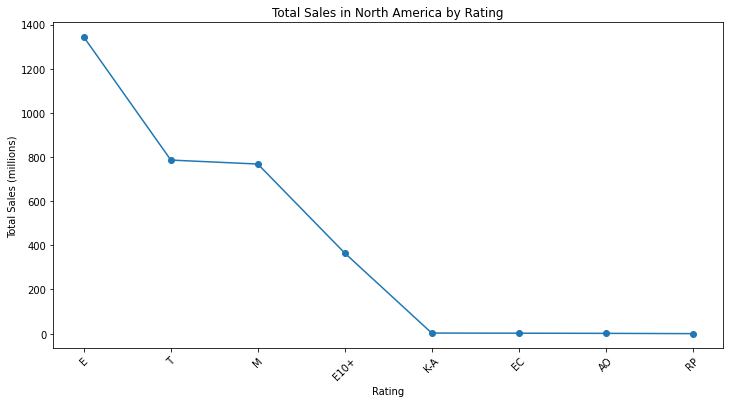

In [72]:
#Grafico de los ratings con mas ventas de NA
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(na_profile_rating['rating'], na_profile_rating['na_sales'], marker='o')

ax.set_title('Total Sales in North America by Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Total Sales (millions)')

plt.xticks(rotation=45)

plt.show()

In [73]:
#Ratings con mas ventas de EU
eu_profile_rating = eu_profile.groupby('rating')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
eu_profile_rating

,rating,eu_sales
1,E,733.83
5,M,501.68
7,T,445.05
2,E10+,195.25
0,AO,0.61
4,K-A,0.29
3,EC,0.11
6,RP,0.08


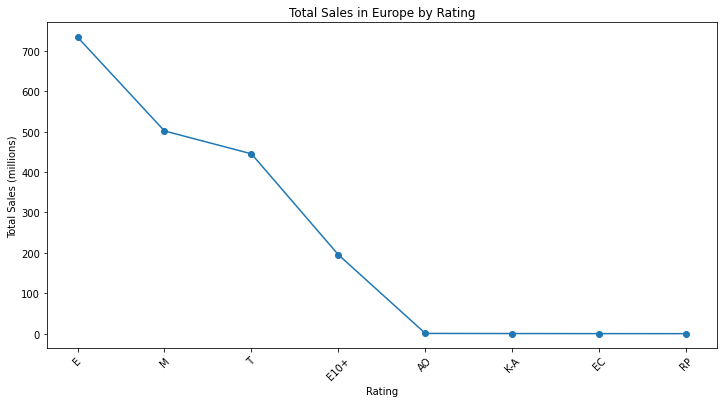

In [74]:
#Grafico de los ratings con mas ventas de EU
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(eu_profile_rating['rating'], eu_profile_rating['eu_sales'], marker='o')

ax.set_title('Total Sales in Europe by Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Total Sales (millions)')

plt.xticks(rotation=45)

plt.show()

In [75]:
#Ratings con mas ventas de JP
jp_profile_rating = jp_profile.groupby('rating')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
jp_profile_rating

,rating,jp_sales
1,E,211.82
7,T,160.20
5,M,68.42
2,E10+,51.45
4,K-A,1.49
0,AO,0.00
3,EC,0.00
6,RP,0.00


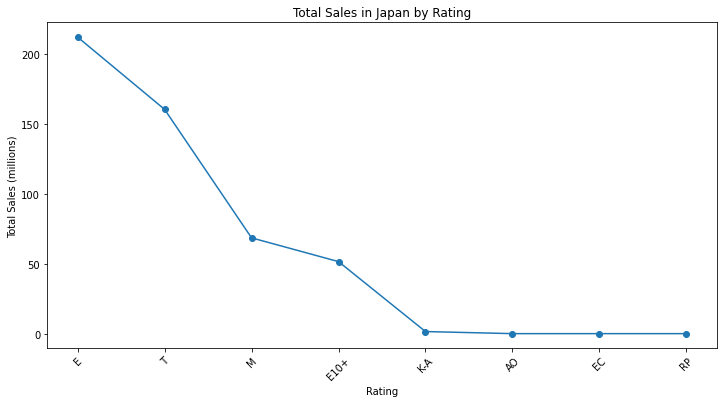

In [76]:
#Grafico de los ratings con mas ventas de JP
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(jp_profile_rating['rating'], jp_profile_rating['jp_sales'], marker='o')

ax.set_title('Total Sales in Japan by Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Total Sales (millions)')

plt.xticks(rotation=45)

plt.show()

Podemos ver que a los 3 perfiles les gusta basicamente lo mismo, solo europa cambiando su quinto puesto por juegos que sean solo para adultos, mientras japon y estados unidos mantienen los mismos top 5 pero en diferente orden.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Bien!

## 5. Prueba de hipotesis

## 5.1 Primera hipotesis

Ahora vamos a probar la siguiente hipotesis:

"Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas."

Vamos a tomar como Hipotesis Nula y Alternativa:

Hipotesis Nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Hipotesis Alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

La razon de la eleccion de hipotesis nula es porque la hipoteis nula es la que busca la igualdad, mientras que la altrnativa es la que rechaza esa igualdad.

Para esto usaremos la funcion de scipy, libreria que contiene muchas herramientas para estadistica, st.ttest_ind(). Esta nos ayuda porque nos compara el promedio de las dos variables que se le provea a la herramienta, y se declara si la varianza es igual o no.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Muy bien que anades informacion sobre H0 y H1

In [77]:
xone = (games.query('platform == "XOne"')).dropna(subset=['user_score'])
pc = (games.query('platform == "PC"')).dropna(subset=['user_score'])

xone = xone[['user_score']]
pc = pc[['user_score']]

#Establecemos el valor umbral de alfa en 0.5, pues es el mas comun.
alpha = 0.5

#Vemos las varianzas de XOne y PC
print(f'La varianza de la critica de usuarios de la plataforma XBox One es: {(np.var(xone))}')
print(f'La varianza de la critica de usuarios de la plataforma PC es: {(np.var(pc))}')

#Usamos la funcion de scipy st.ttest_ind().
result_1 = st.ttest_ind(xone, pc, equal_var=False)

#Ahora comprobemos
print('p-value:', result_1.pvalue)

if alpha > result_1.pvalue:
    print('Rechazamos la Hipotesis Nula, entonces: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.')
else:
    print('No rechazamos la Hipotesis Nula, entonces: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.')

La varianza de la critica de usuarios de la plataforma XBox One es: user_score    1.896519
dtype: float64
La varianza de la critica de usuarios de la plataforma PC es: user_score    2.337747
dtype: float64
p-value: [4.93507236e-06]
Rechazamos la Hipotesis Nula, entonces: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.


Vimos que las calificaciones promedio de los usuarios para las plataformas XBox One y PC son diferentes, pues rechazamos la hipotesis nula.

## 5.2 Segunda hipotesis

Ahora probemos la siguiente hipotesis: 

"Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes."

Vamos a tomar como Hipotesis Nula y Alternativa:

Hipotesis Nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son similares.

Hipotesis Alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

La razon de la eleccion de hipotesis nula es porque la hipoteis nula es la que busca la igualdad, mientras que la altrnativa es la que rechaza esa igualdad.

Para esto usaremos la funcion de scipy, libreria que contiene muchas herramientas para estadistica, st.ttest_ind(). Esta nos ayuda porque nos compara el promedio de las dos variables que se le provea a la herramienta, y se declara si la varianza es igual o no.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Muy bien que anades informacion sobre H0 y H1

In [78]:
action = (games.query('genre == "Action"')).dropna(subset=['user_score'])
sports = (games.query('genre == "Sports"')).dropna(subset=['user_score'])

action = action[['user_score']]
sports = sports[['user_score']]

#Vemos las varianzas del genero y del genero deportes
print(f'La varianza de la critica de usuarios del genero accion: {(np.var(action))}')
print(f'La varianza de la critica de usuarios del genero deportes: {(np.var(sports))}')

#Usamos la funcion de scipy st.ttest_ind().
result_2 = st.ttest_ind(action, sports, equal_var=False)

print('p-value:', result_2.pvalue)

#Ahora comprobemos
if alpha > result_2.pvalue:
    print('Rechazamos la Hipotesis Nula, entonces: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.')
else:
    print('No rechazamos la Hipotesis Nula, entonces: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son similares.')

La varianza de la critica de usuarios del genero accion: user_score    2.030637
dtype: float64
La varianza de la critica de usuarios del genero deportes: user_score    2.594161
dtype: float64
p-value: [0.11483819]
Rechazamos la Hipotesis Nula, entonces: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


Comprobamos que las calificaciones promedio de los usuarios para los generos de accion y deportes son diferentes mediante el metodo "st.ttest_ind()".

# Conclusiones generales.

## Primera Conclusion

Podemos ver que el dataframe en conjunto trajo en si muchas valores ausentes, y la decision tomada fue no imputar sobre aquellos que sea dificil hallar una fuente del por que de su existencia. Por ejemplo, imputar sobre el rating con las siglas "RP" (Calificacion pendiente) pudiera afectar al dataframe demostrando que muchos juegos que tenian un valor ausente en la columna "rating" ahora son clasificacion "RP". Al sacar conclusiones sobre los ratings esto hubiera demostrado que a lo mejor el rating "RP" era el mas popular, mientras puede que esa conclusion este muy alejada de la realidad.

## Segunda Conclusion

Al hacer graficos de todo tipo, mayormente lineales, pudimos ver que las consolas mas populares desde el 2000 a la fecha de extraccion de datos (2016) fueron "Wii", "NES", "GB", "DS", "X360", "PS3", "PS2", "SNES", "GBA", y "PS4". Luego como queriamos ver cual es la plataforma que tiene mas ventas recientes y menos decrecimiento hicimos un grafico lineal y de barras, con lo que la PS4 resulto como la consola con menos decrecimiento del 2010 en adelante. Esto nos sirve para poder predecir que consola usar para sacar videojuegos.

Luego a traves de los datos sacados de generos de juegos por region, y calificacion por region, nos dimos cuenta que si queremos sacar un juego deberia ser del genero accion y rating "E" (Para todos) si es en las regiones de Europa y Norteamerica, mientras que para Japon no cambia el rating pero si el genero a "Role-Playing". Dependiendo del enfoque de la empresa se debe tomar este analisis para poder sacar un mejor provecho a la rentabilidad e ingresos.

## Tercera Conclusion

Probamos dos hipotesis en este caso:

-Las calificaciones promedio de usuario en las plataformas XBox One y PC son iguales.

-Las calificaciones promedio de usuario en los generos deporte y accion son iguales.

En ambos casos rechazamos la hipotesis nula, e indicamos que ambas calificaciones promedio son diferentes. Tambien indicamos la varianza y usamos la herramienta de "st.ttest_ind()", que nos ayuda a comparar los promedios indicando si su varianza es igual.

## Conclusion final

Para concluir con este analisis podemos decir que para la empresa Icee, podemos implementar accion sobre la creacion de videojuegos de accion, deporte, o role-playing dependiendo cual es nuestro enfoque (si es japon, role-playing) y que este juego este disponible en la plataforma PS4, pues es la que tiene menos decrecimiento en ventas. Nuestro enfoque deberia ser dirigido en hacer juegos de este estilo, pues es el preferido de los usuarios a traves de los años, a lo mejor esto pueda cambiar en el futuro, pero de momento para el 2017 deberían tomarse en cuenta estas sugerencias para la creación exitosa de videojuegos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Muchas gracias por tu trabajo! Te pido anadir los titulos a unos graficos y tambien los conclusiones a unas partes y despues estoy lista para aceptar tu trabajo!

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Ahora todo esta bien! El proyecto esta aceptado!